### Import the libraries

In [219]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Load Datasets

In [220]:
## Reading the train and test set.
df_train= pd.read_csv('training_titanic.csv')
df_test= pd.read_csv('test_titanic.csv')
print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)


In [221]:
## Combining the datasets.
df= pd.concat([df_train,df_test], axis=0)

In [222]:
## Checking for null values in df
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [223]:
## General information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [224]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


### Data Preprocessing

In [225]:
## Working with null values
df['Age'].interpolate(inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].interpolate(inplace=True)

In [226]:
## Working with categorical data.
df['Sex'].replace({'male': 0, 'female': 1}, inplace= True)

In [227]:
## Merging SibSp and Parch,
df['Family Members']=df['SibSp']+df['Parch']
df.drop(['SibSp','Parch'], axis=1, inplace=True)

In [228]:
## Splitting Name and getting unique values
stg=df['Name'].apply(lambda x: x.split(" ")[1][:-1]).unique()
stg

array(['Mr', 'Mrs', 'Miss', 'Master', 'Planke', 'Don', 'Rev', 'Billiard',
       'de', 'Walle', 'Dr', 'Pelsmaeker', 'Mulder', '', 'Steen', 'Carlo',
       'Mme', 'Impe', 'Ms', 'Major', 'Gordon', 'Messemaeker', 'Mlle',
       'Col', 'Capt', 'Velde', 'th', 'Shawah', 'Jonkheer', 'Melkebeke',
       'Cruyssen', 'Khalil', 'Palmquist', 'Brito'], dtype=object)

In [229]:
## Updating Name
df['Name']=df['Name'].apply(lambda x: x.split(" ")[1][:-1])

In [230]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family Members
0,1,0.0,3,Mr,0,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,Mrs,1,38.0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,Miss,1,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1.0,1,Mrs,1,35.0,113803,53.1000,C123,S,1
4,5,0.0,3,Mr,0,35.0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,Mr,0,33.5,A.5. 3236,8.0500,NaN,S,0
414,1306,NaN,1,,1,39.0,PC 17758,108.9000,C105,C,0
415,1307,NaN,3,Mr,0,38.5,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,NaN,3,Mr,0,38.5,359309,8.0500,NaN,S,0


In [231]:
## Converting Name to 4 categories
for i,name in enumerate(df['Name']):
    if(name in ['Don', 'Major', 'Capt', 'Rev', 'Col', 'Carlo','Gordon','Walle']):
        df['Name'].replace(df.iloc[i]['Name'],'Mr',inplace=True)
        
    elif(name in ['Mlle','Ms']):
        df['Name'].replace(df.iloc[i]['Name'],'Miss',inplace=True)
        
    elif(name in ['Mme','Countess']):
        df['Name'].replace(df.iloc[i]['Name'],'Mrs',inplace=True)
        
    elif(name in ['Master','Mr','Mrs','Miss']):
        continue
        
    else:
        if(df.iloc[i]['Sex']==0):
            df['Name'].replace(df.iloc[i]['Name'],'Mr',inplace=True)
        elif(df.iloc[i]['Sex']==1):
            df['Name'].replace(df.iloc[i]['Name'],'Miss',inplace=True)
            
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family Members
413,1305,NaN,3,Mr,0,33.5,A.5. 3236,8.0500,NaN,S,0
414,1306,NaN,1,Miss,1,39.0,PC 17758,108.9000,C105,C,0
415,1307,NaN,3,Mr,0,38.5,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,NaN,3,Mr,0,38.5,359309,8.0500,NaN,S,0
417,1309,NaN,3,Master,0,38.5,2668,22.3583,NaN,C,2


In [232]:
df['Name'].value_counts()

Mr        779
Miss      279
Mrs       192
Master     59
Name: Name, dtype: int64

### Exploratory Data Analysis (EDA)

In [233]:
## Relation between Pclass and Survived.
x=df.groupby('Survived')['Pclass'].value_counts()
x

Survived  Pclass
0.0       3         372
          2          97
          1          80
1.0       1         136
          3         119
          2          87
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass'>

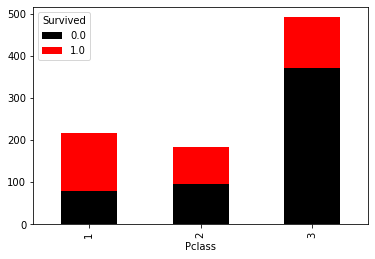

In [234]:
pd.crosstab(df['Pclass'], df['Survived']).plot(kind='bar', stacked=True, color=['black','red'])

People having ticket class 3 (low socio-economic status) experienced the highest number of deaths.
People who survived were mostly belonging to 1st class.

<AxesSubplot:ylabel='Sex,Survived'>

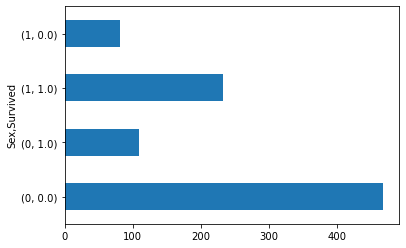

In [235]:
## Relation of gender with survival.
df.groupby('Sex')['Survived'].value_counts().plot.barh()

Men experienced most number of deaths.

<AxesSubplot:xlabel='Age'>

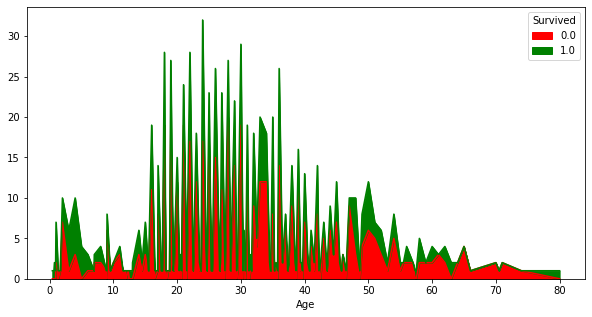

In [236]:
# Relation of age with survival.
pd.crosstab(df['Age'], df['Survived']).plot(kind='area',figsize=(10,5), color=['red','green'])

Most amount of deaths were of people in the age group of 15-30.

In [237]:
df.groupby('Embarked')['Survived'].value_counts()

Embarked  Survived
C         1.0          93
          0.0          75
Q         0.0          47
          1.0          30
S         0.0         427
          1.0         219
Name: Survived, dtype: int64

<AxesSubplot:>

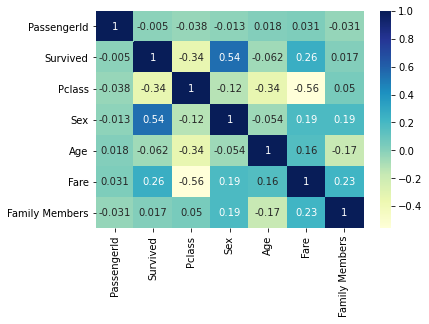

In [238]:
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)

In [239]:
# Using one-hot encoding to encode Embarked and Name column,
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()
df['Embarked']=label.fit_transform(df['Embarked'])
df['Name']=label.fit_transform(df['Name'])

In [240]:
df= pd.get_dummies(df,columns=['Name','Embarked'])

In [241]:
df

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Family Members,Name_0,Name_1,Name_2,Name_3,Embarked_0,Embarked_1,Embarked_2
0,1,0.0,3,0,22.0,A/5 21171,7.2500,NaN,1,0,0,1,0,0,0,1
1,2,1.0,1,1,38.0,PC 17599,71.2833,C85,1,0,0,0,1,1,0,0
2,3,1.0,3,1,26.0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,0,0,0,1
3,4,1.0,1,1,35.0,113803,53.1000,C123,1,0,0,0,1,0,0,1
4,5,0.0,3,0,35.0,373450,8.0500,NaN,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,0,33.5,A.5. 3236,8.0500,NaN,0,0,0,1,0,0,0,1
414,1306,NaN,1,1,39.0,PC 17758,108.9000,C105,0,0,1,0,0,1,0,0
415,1307,NaN,3,0,38.5,SOTON/O.Q. 3101262,7.2500,NaN,0,0,0,1,0,0,0,1
416,1308,NaN,3,0,38.5,359309,8.0500,NaN,0,0,0,1,0,0,0,1


In [242]:
## Dropping irrelevant columns,
df.drop(columns=['PassengerId','Ticket','Cabin'], inplace= True)

In [243]:
df

,Survived,Pclass,Sex,Age,Fare,Family Members,Name_0,Name_1,Name_2,Name_3,Embarked_0,Embarked_1,Embarked_2
0,0.0,3,0,22.0,7.2500,1,0,0,1,0,0,0,1
1,1.0,1,1,38.0,71.2833,1,0,0,0,1,1,0,0
2,1.0,3,1,26.0,7.9250,0,0,1,0,0,0,0,1
3,1.0,1,1,35.0,53.1000,1,0,0,0,1,0,0,1
4,0.0,3,0,35.0,8.0500,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,0,33.5,8.0500,0,0,0,1,0,0,0,1
414,NaN,1,1,39.0,108.9000,0,0,1,0,0,1,0,0
415,NaN,3,0,38.5,7.2500,0,0,0,1,0,0,0,1
416,NaN,3,0,38.5,8.0500,0,0,0,1,0,0,0,1


In [244]:
## Splitting into X and Y,
X = df.drop(columns=['Survived'])
Y = df[['Survived']]

In [245]:
# Splitting into train and test set,
X_train= X[:891]
Y_train = Y[:891]
X_test= X[891:]
Y_test= Y[891:]

### Model Training

In [246]:
## Building classification model using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier()
random.fit(X_train, Y_train)
print('Model trained!')

<ipython-input-246-13c89ccd7737>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random.fit(X_train, Y_train)


Model trained!


In [249]:
from sklearn.model_selection import GridSearchCV
params = { 
              "max_features": [1, 3, 5 ,7, 10],
              "min_samples_split": [2, 3,4,5,6,7,8,9,10],
              "n_estimators" :[100,300, 500, 700, 1000, 1200, 1500, 1700],
              "criterion": ["gini", "entropy"]
          }
gs = GridSearchCV(random,param_grid=params, scoring="accuracy", n_jobs= -1, verbose = 1)

gs.fit(X_train,Y_train)

print(gs.best_estimator_)
print(gs.best_score_)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed: 38.6min finished
C:\Users\mehta\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomForestClassifier(max_features=10, min_samples_split=8, n_estimators=1700)
0.8518737053543406


In [261]:
## Make predictions 
y_pred= random.predict(X_test)
y_pred

array([0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 1.

In [262]:
submission= pd.DataFrame({'PassengerId':df_test['PassengerId'],'Survived':y_pred})
submission.to_csv('Titanic_submission.csv', index=False)

In [263]:
submission

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,1.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0
